In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

# correlation_data csv를 불러옴
correlation_data = pd.read_csv(os.path.join(os.getcwd(), 'correlation_data_with_C_max.csv'))

correlation_data

,File_name,Type,Objective_value,C_max,C_avg
0,prev_Truck_20_LP_0_0_100_1rep.csv,Min,63800,427.120,384.7000
1,now_Truck_20_LP_0_0_100_1rep.csv,Min,68000,436.192,390.1900
2,prev_Truck_20_LP_40_50_10_1rep.csv,Min,34751,413.552,382.6468
3,now_Truck_20_LP_40_50_10_1rep.csv,Min,34924,451.584,394.8568
4,prev_Truck_20_LP_0_0_100_1rep.csv,Middle,98400,466.880,428.1868
...,...,...,...,...,...
235,now_Truck_20_LP_40_50_10_20rep.csv,Middle,48319,458.872,421.6148
236,prev_Truck_20_LP_0_0_100_20rep.csv,Max,112800,490.896,439.8356
237,now_Truck_20_LP_0_0_100_20rep.csv,Max,115600,490.912,435.9680
238,prev_Truck_20_LP_40_50_10_20rep.csv,Max,59834,480.576,437.9800


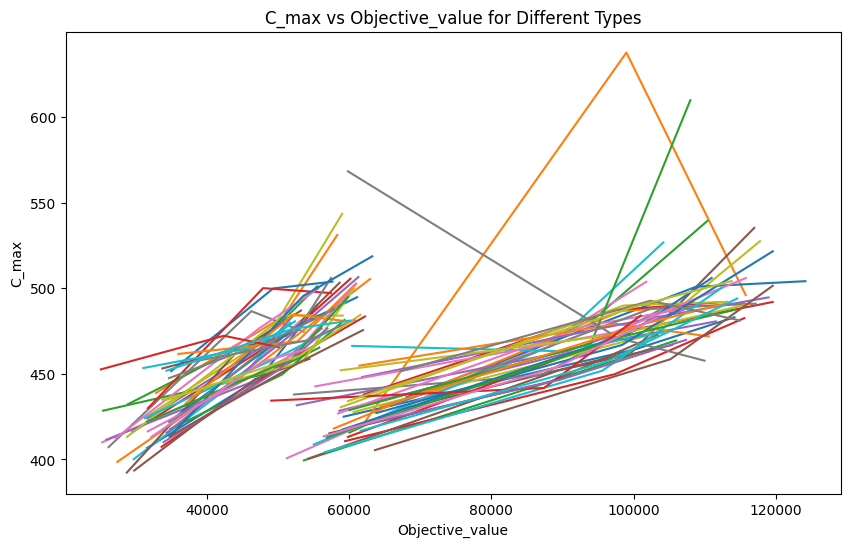

In [11]:
# File_name에서 Min, Middle, Max 순으로 정렬
correlation_data['Type'] = pd.Categorical(correlation_data['Type'], categories=['Min', 'Middle', 'Max'], ordered=True)
# 'File_name'을 기준으로 데이터 분류
grouped_data = correlation_data.groupby('File_name')

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# Type 값에 따라 그래프 그리기
for name, group in grouped_data:
    group = group.sort_values(by='Type')  # Type 기준으로 정렬
    ax.plot(group['Objective_value'], group['C_max'], label=name)

# 그래프에 레이블, 제목 등 추가
ax.set_xlabel('Objective_value')
ax.set_ylabel('C_max')
ax.set_title('C_max vs Objective_value for Different Types')
# ax.legend()
plt.show()